<a href="https://colab.research.google.com/github/Daya-1-sgr/ecommerce_transactions_datasets/blob/main/E_Sagar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
customers=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Customers.csv')
products=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Products.csv')
transactions=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Transactions.csv')

In [129]:
merged_data= pd.merge(transactions, products, on="ProductID")
merged_data = pd.merge(merged_data, customers, on="CustomerID")

In [130]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [131]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [132]:
from datetime import datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data.drop('Price_y',axis=1,inplace=True)
merged_data.rename(columns={'Price_x': 'ProductPrice'}, inplace=True)

In [133]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


In [134]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   ProductPrice     1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   CustomerName     1000 non-null   object        
 10  Region           1000 non-null   object        
 11  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [135]:
merged_data.describe()

,TransactionDate,Quantity,TotalValue,ProductPrice,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,NaN


In [136]:
customer_agg=merged_data.groupby('CustomerID').agg(
    AverageTransactionValue=('TotalValue', 'mean'),
    TotalRevenue=('TotalValue','sum'),
    TotalQuantitySold=('Quantity','sum'),
    PurchaseFrequency=('TransactionID','count'),
    LastPurchase=('TransactionDate','max'),
    Region=('Region','first'),
    MostFrequentCategory=('Category', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Recency=('TransactionDate', lambda x: (datetime.now() - x.max()).days),
    MostcostlyProduct=('ProductPrice', lambda x: x.max()),
    LeastcostlyProduct=('ProductPrice', lambda x: x.min()),
    CustomerSince=('SignupDate', lambda x: (datetime.now() - x.max()).days)
).reset_index()

In [137]:
customer_agg.head()

,CustomerID,AverageTransactionValue,TotalRevenue,TotalQuantitySold,PurchaseFrequency,LastPurchase,Region,MostFrequentCategory,Recency,MostcostlyProduct,LeastcostlyProduct,CustomerSince
0,C0001,670.904,3354.52,12,5,2024-11-02 17:04:16,South America,Electronics,86,455.72,57.30,932
1,C0002,465.685,1862.74,10,4,2024-12-03 01:41:41,Asia,Clothing,55,385.37,95.69,1079
2,C0003,681.345,2725.38,14,4,2024-08-24 18:54:04,South America,Home Decor,155,346.30,30.59,326
3,C0004,669.360,5354.88,23,8,2024-12-23 14:13:52,South America,Books,35,338.66,146.85,841
4,C0005,678.080,2034.24,7,3,2024-11-04 00:30:22,Asia,Electronics,84,430.59,159.60,896


In [138]:
dummies = pd.get_dummies(customer_agg[['MostFrequentCategory','Region']], prefix=['MostFrequentCategory','Region'])


In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['TotalRevenue', 'TotalQuantitySold', 'PurchaseFrequency','Recency','CustomerSince','AverageTransactionValue','MostcostlyProduct','LeastcostlyProduct']
customer_agg[numerical_features] = scaler.fit_transform(customer_agg[numerical_features])

In [140]:
customer_agg=pd.concat([customer_agg,dummies],axis=1)
customer_agg.head()

,CustomerID,AverageTransactionValue,TotalRevenue,TotalQuantitySold,PurchaseFrequency,LastPurchase,Region,MostFrequentCategory,Recency,MostcostlyProduct,LeastcostlyProduct,CustomerSince,MostFrequentCategory_Books,MostFrequentCategory_Clothing,MostFrequentCategory_Electronics,MostFrequentCategory_Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,0.474336,0.308942,0.354839,0.4,2024-11-02 17:04:16,South America,Electronics,0.155556,0.907924,0.085575,0.842204,False,False,True,False,False,False,False,True
1,C0002,0.308940,0.168095,0.290323,0.3,2024-12-03 01:41:41,Asia,Clothing,0.069444,0.753844,0.165276,0.979458,False,True,False,False,True,False,False,False
2,C0003,0.482751,0.249541,0.419355,0.3,2024-08-24 18:54:04,South America,Home Decor,0.347222,0.668273,0.030124,0.276377,False,False,False,True,False,False,False,True
3,C0004,0.473092,0.497806,0.709677,0.7,2024-12-23 14:13:52,South America,Books,0.013889,0.651540,0.271487,0.757236,True,False,False,False,False,False,False,True
4,C0005,0.480120,0.184287,0.193548,0.2,2024-11-04 00:30:22,Asia,Electronics,0.150000,0.852884,0.297957,0.808590,False,False,True,False,True,False,False,False


In [141]:
customer_agg.drop(['MostFrequentCategory','Region','LastPurchase'],axis=1,inplace=True)
customer_agg.head()

,CustomerID,AverageTransactionValue,TotalRevenue,TotalQuantitySold,PurchaseFrequency,Recency,MostcostlyProduct,LeastcostlyProduct,CustomerSince,MostFrequentCategory_Books,MostFrequentCategory_Clothing,MostFrequentCategory_Electronics,MostFrequentCategory_Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,0.474336,0.308942,0.354839,0.4,0.155556,0.907924,0.085575,0.842204,False,False,True,False,False,False,False,True
1,C0002,0.308940,0.168095,0.290323,0.3,0.069444,0.753844,0.165276,0.979458,False,True,False,False,True,False,False,False
2,C0003,0.482751,0.249541,0.419355,0.3,0.347222,0.668273,0.030124,0.276377,False,False,False,True,False,False,False,True
3,C0004,0.473092,0.497806,0.709677,0.7,0.013889,0.651540,0.271487,0.757236,True,False,False,False,False,False,False,True
4,C0005,0.480120,0.184287,0.193548,0.2,0.150000,0.852884,0.297957,0.808590,False,False,True,False,True,False,False,False


In [142]:
features=customer_agg.drop('CustomerID',axis=1)

In [143]:
features.head()

,AverageTransactionValue,TotalRevenue,TotalQuantitySold,PurchaseFrequency,Recency,MostcostlyProduct,LeastcostlyProduct,CustomerSince,MostFrequentCategory_Books,MostFrequentCategory_Clothing,MostFrequentCategory_Electronics,MostFrequentCategory_Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
0,0.474336,0.308942,0.354839,0.4,0.155556,0.907924,0.085575,0.842204,False,False,True,False,False,False,False,True
1,0.308940,0.168095,0.290323,0.3,0.069444,0.753844,0.165276,0.979458,False,True,False,False,True,False,False,False
2,0.482751,0.249541,0.419355,0.3,0.347222,0.668273,0.030124,0.276377,False,False,False,True,False,False,False,True
3,0.473092,0.497806,0.709677,0.7,0.013889,0.651540,0.271487,0.757236,True,False,False,False,False,False,False,True
4,0.480120,0.184287,0.193548,0.2,0.150000,0.852884,0.297957,0.808590,False,False,True,False,True,False,False,False


In [144]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca_data=pca.fit_transform(features)

In [145]:
print(pca.explained_variance_ratio_)

[0.16760851 0.15723395 0.14344752 0.12418944 0.11856065 0.10750697]


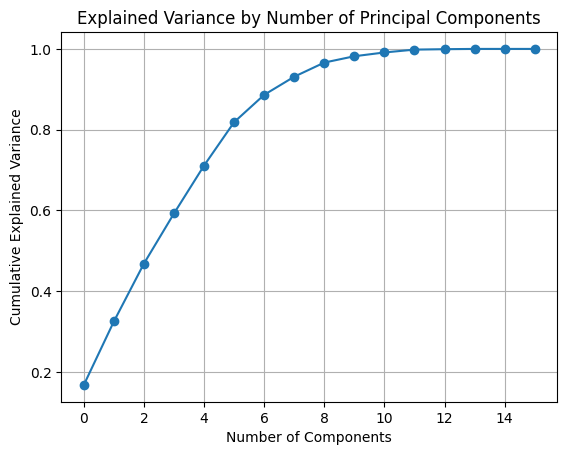

In [146]:
plt.plot(np.cumsum(PCA().fit(features).explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Number of components=6 based on elbow method

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [148]:
def evaluate_clustering(model, data, labels):
    db_index = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return db_index, silhouette
results = []
kmeans_models = []

In [149]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(pca_data)
    db_score, sil_score = evaluate_clustering(kmeans, pca_data, kmeans_labels)
    kmeans_models.append((n_clusters, kmeans))
    results.append({
        'Clusters': n_clusters,
        'DB_Score': db_score,
        'Silhouette_Score': sil_score,
        'No_of_pca_components': 6
        })


In [150]:
results_df = pd.DataFrame(results)
print(results_df)


   Clusters  DB_Score  Silhouette_Score  No_of_pca_components
0         2  2.264313          0.191265                     6
1         3  1.616477          0.303688                     6
2         4  1.525663          0.329262                     6
3         5  1.372474          0.355367                     6
4         6  1.047307          0.408663                     6
5         7  0.903860          0.435849                     6
6         8  0.939744          0.496005                     6
7         9  0.845497          0.555731                     6


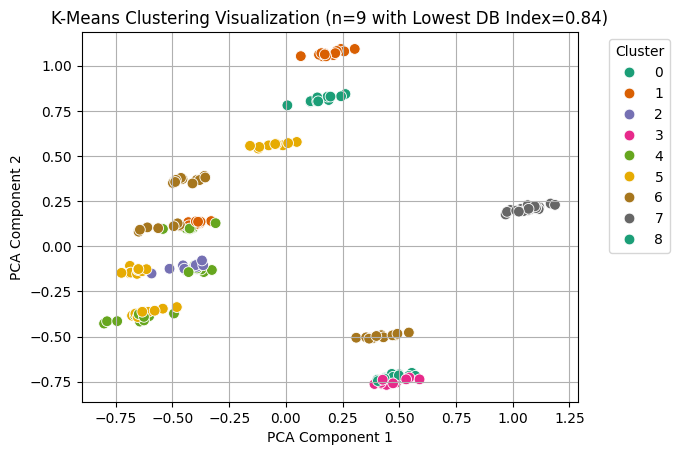

In [151]:
best_kmeans = kmeans_models[np.argmin(results_df['DB_Score'])][1]
best_kmeans_labels = best_kmeans.predict(pca_data)
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1], hue=best_kmeans_labels, s=60,palette='Dark2')
plt.title('K-Means Clustering Visualization (n=9 with Lowest DB Index=0.84)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster',bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()

In [152]:
x_values = np.mean(pca_data[:, [0, 2, 4]], axis=1)
y_values = np.mean(pca_data[:, [1, 3, 5]], axis=1)
mean_features = np.vstack([x_values, y_values]).T

In [153]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(mean_features)
    db_score, sil__score= evaluate_clustering(kmeans, mean_features, kmeans_labels)
    kmeans_models.append((n_clusters, kmeans))
    results.append({
        'Clusters': n_clusters,
        'DB_Score': db_score,
        'Silhouette_Score': sil_score,
        'No_of_pca_components': 2
        })

In [154]:
results_df = pd.DataFrame(results)
print(results_df)

    Clusters  DB_Score  Silhouette_Score  No_of_pca_components
0          2  2.264313          0.191265                     6
1          3  1.616477          0.303688                     6
2          4  1.525663          0.329262                     6
3          5  1.372474          0.355367                     6
4          6  1.047307          0.408663                     6
5          7  0.903860          0.435849                     6
6          8  0.939744          0.496005                     6
7          9  0.845497          0.555731                     6
8          2  1.162204          0.555731                     2
9          3  0.684262          0.555731                     2
10         4  0.622432          0.555731                     2
11         5  0.580561          0.555731                     2
12         6  0.522602          0.555731                     2
13         7  0.527869          0.555731                     2
14         8  0.405729          0.555731               

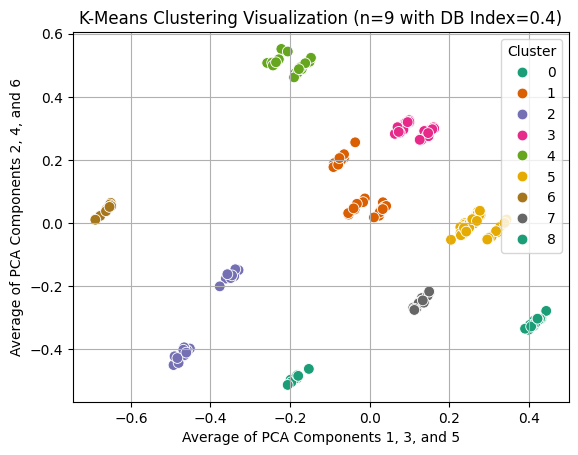

In [155]:
best_kmeans = kmeans_models[np.argmin(results_df['DB_Score'])][1]
kmeans_labels = best_kmeans.predict(mean_features)
sns.scatterplot(x=x_values, y=y_values, hue=kmeans_labels, s=60, palette='Dark2')
plt.title('K-Means Clustering Visualization (n=9 with DB Index=0.4)')
plt.xlabel('Average of PCA Components 1, 3, and 5')
plt.ylabel('Average of PCA Components 2, 4, and 6')
plt.legend(title='Cluster',bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()